# 2. 타이타닉 분석 파이프라인
271p

In [49]:
#관련 라이브러리 불러오기
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

#타이타닉 데이터 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/duswn/Desktop/연구실/책교정/titanic.csv'
df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


272p

In [50]:
#데이터 백업하기
titanic_copy_backup = df.copy()
#to_csv 메소드를 사용하여 내장 데이터프레임을 csv 파일로 저장
#df.to_csv('C:/data/titanic_csv_backup.csv')

#저장 파일 확인
#file_path = 'C:/data/titanic_csv_backup.csv'
#titanic_csv_backup = pd.read_csv(file_path)
#titanic_csv_backup

273p

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [57]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [58]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [59]:
df.sort_values(by=['Fare'], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [60]:
df.sort_values(by=['Fare'], axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [61]:
df.sort_index(axis=1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369


In [62]:
df.sum(axis=1)

0       34.2500
1      114.2833
2       40.9250
3       95.1000
4       51.0500
         ...   
886    929.0000
887    939.0000
888    918.4500
889    948.0000
890    933.7500
Length: 891, dtype: float64

276p

In [63]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [64]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

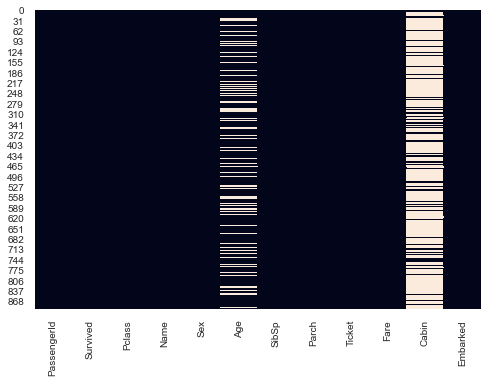

In [65]:
#결측치 시각화
sns.heatmap(df.isnull(), cbar=False)

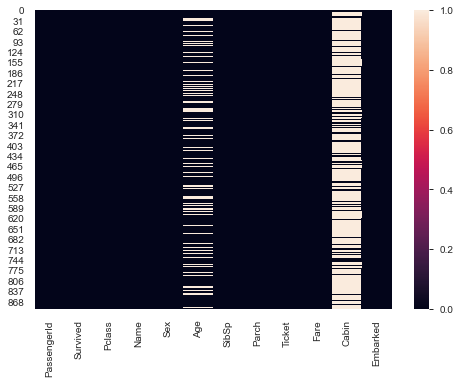

In [66]:
sns.heatmap(df.isnull(), cbar=True)

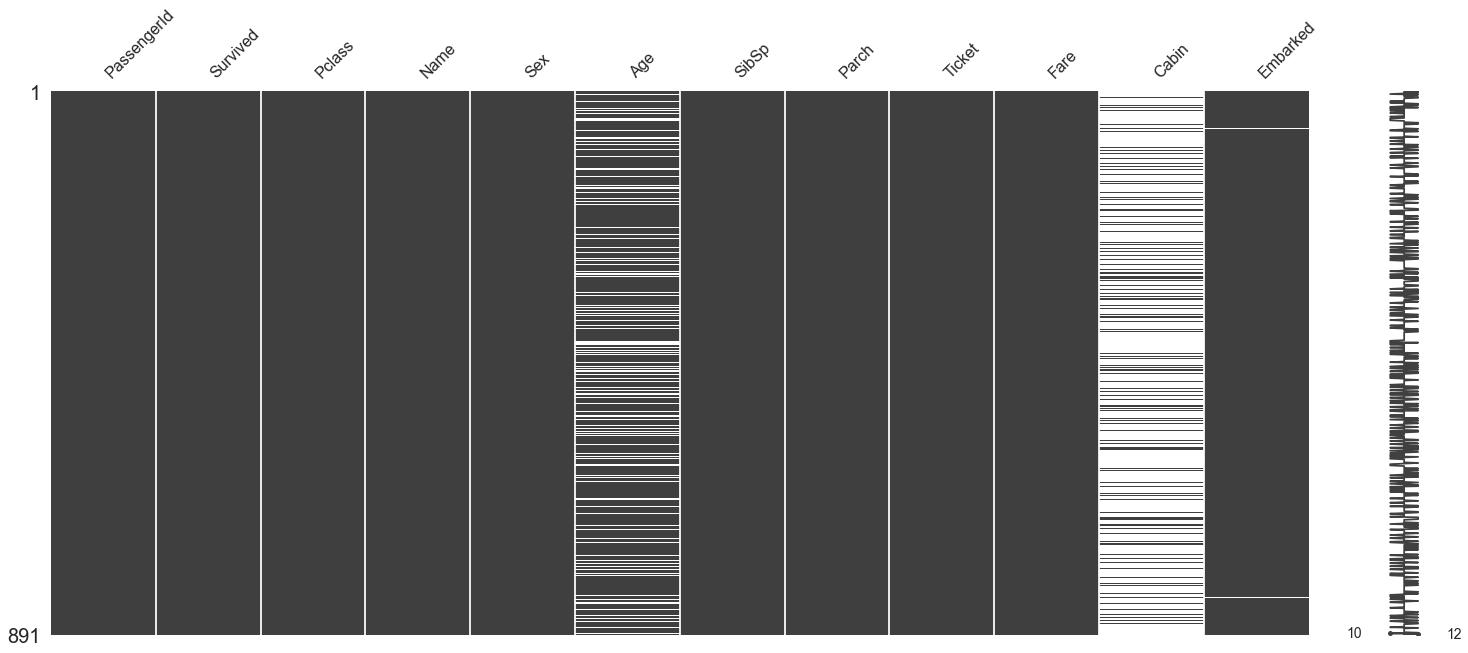

In [67]:
import missingno as msno
msno.matrix(df)

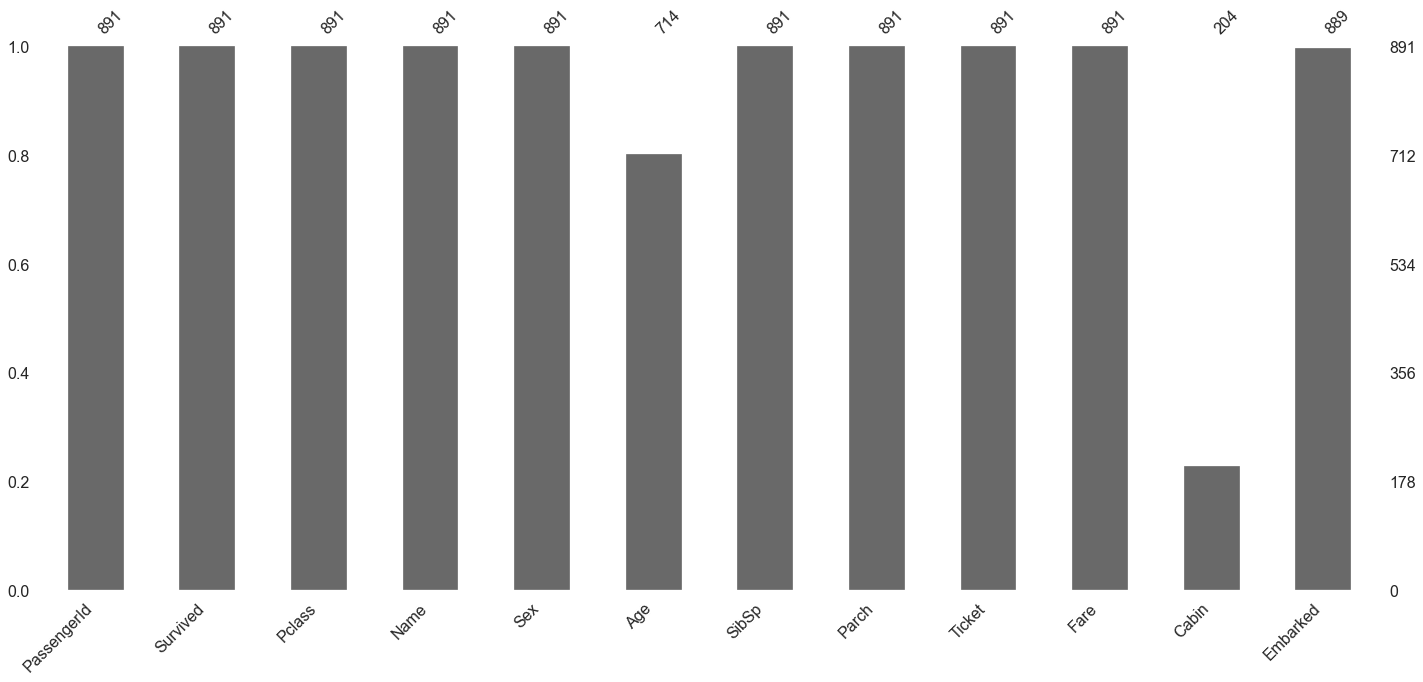

In [68]:
msno.bar(df)

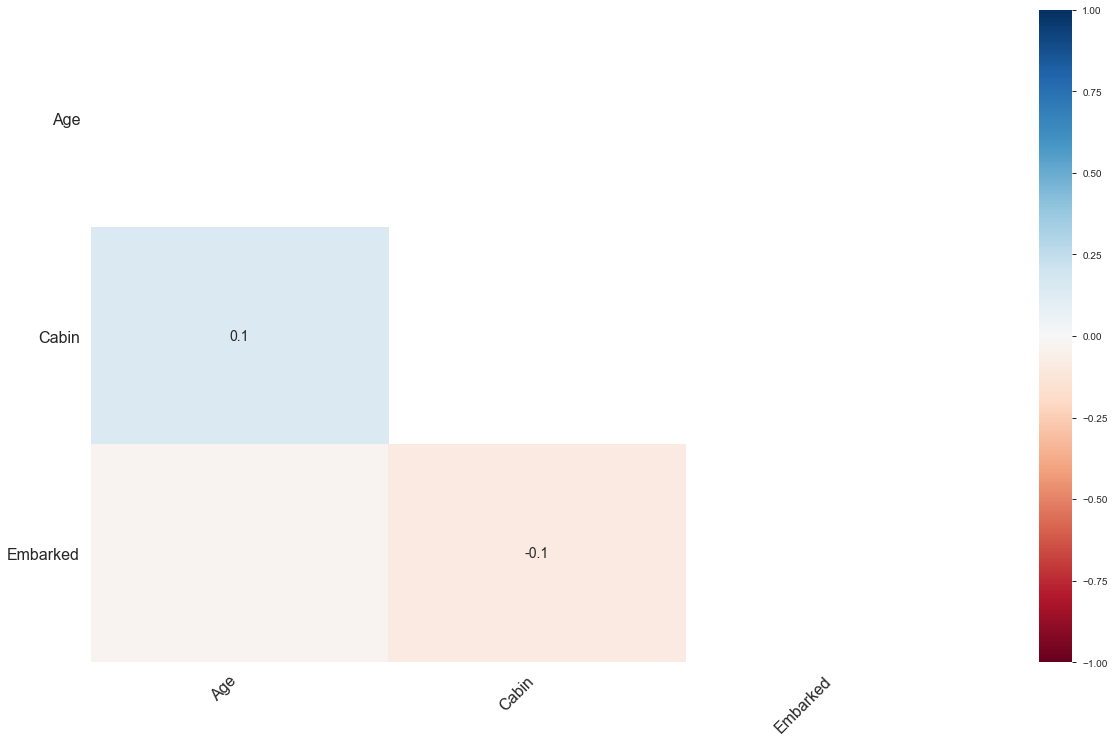

In [69]:
msno.heatmap(df)

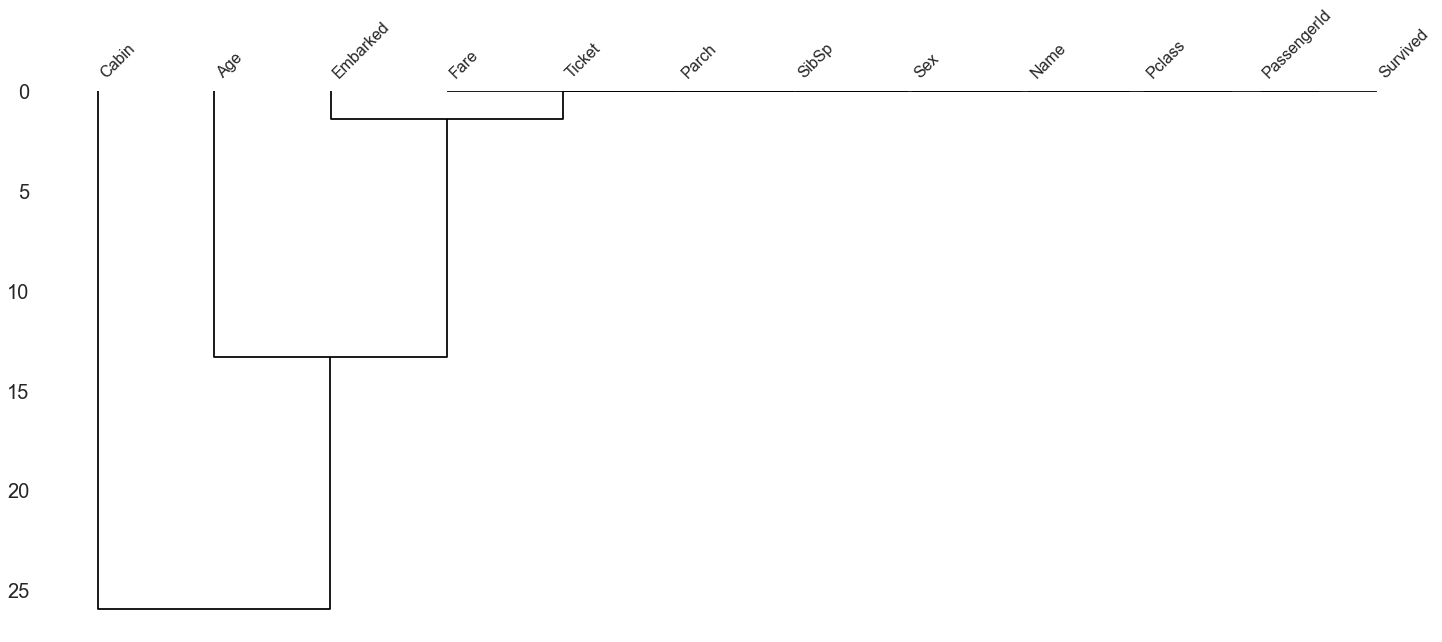

In [70]:
msno.dendrogram(df)

In [71]:
#Cabin 결측 제거
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
E38            1
A23            1
D15            1
E50            1
C111           1
Name: Cabin, Length: 147, dtype: int64

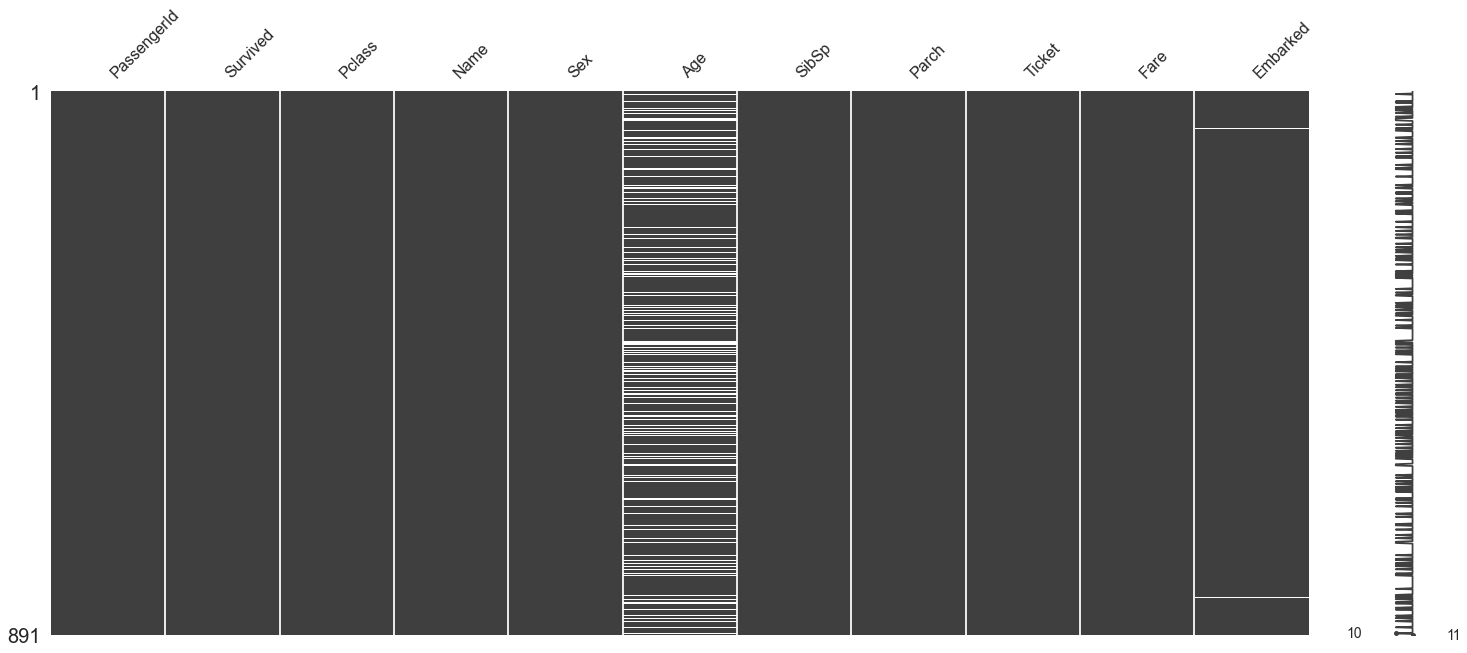

In [72]:
df = df.dropna(thresh = int(len(df)*0.5), axis=1)
msno.matrix(df)

In [73]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

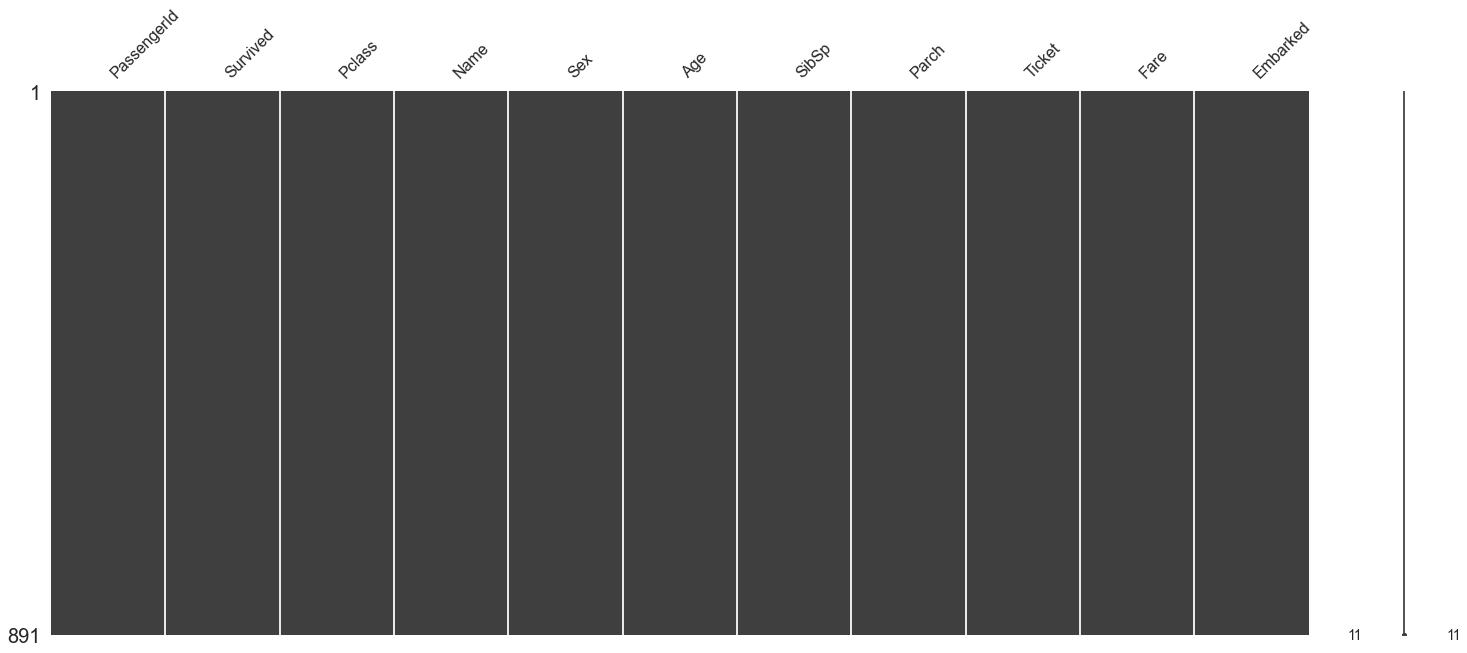

In [74]:
df['Embarked'] = df['Embarked'].fillna('S')

#나이 대체
df['Age'] = df['Age'].fillna(df['Age'].mean())
msno.matrix(df)

280p

In [75]:
#데이터 바이닝 - 연속형 나이 변수 범주화cut()함수 사용
bins = [1, 20, 60, 100]
df_Age = pd.cut(df['Age'], bins, labels = ['미성년', '성년', '노년'])
df['Age_class'] = df_Age
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,성년
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,성년
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,성년
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,성년
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,성년
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,성년
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,미성년
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,성년
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,성년


In [76]:
t1 = df.Age_class.unique()
t2 = df[df.Age_class.isin(['미성년'])]
t3 = df[~df.Age_class.isin(['미성년'])]
print(t1)
print(t2)
print(t3)

[성년, 미성년, 노년, NaN]
Categories (3, object): [미성년 < 성년 < 노년]
     PassengerId  Survived  Pclass                                  Name  \
7              8         0       3        Palsson, Master. Gosta Leonard   
9             10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3       Sandstrom, Miss. Marguerite Rut   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
..           ...       ...     ...                                   ...   
869          870         1       3       Johnson, Master. Harold Theodor   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   
876          877         0       3         Gustafsson, Mr. Alfred Ossian   
877          878         0       3                  Petroff, Mr. Nedelio   
887          888         1       1          Graham, Miss. Margaret Edith   

        Sex   Age  SibSp  Pa

281p

In [77]:
#전체를 3개 범주로 구분
df_Age2 = pd.qcut(df['Age'], q=3, labels=['미성년', '성년', '노년'])
df['Age_class2'] = df_Age2
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_class,Age_class2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,성년,미성년
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,성년,노년
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,성년,성년
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,성년,노년
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,성년,노년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,성년,성년
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,미성년,미성년
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,성년,성년
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,성년,성년


In [78]:
#범주형 컬럼 처리
#원핫인코딩
df['Sex'] = df['Sex'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df3 = pd.get_dummies(df)
df3

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Age_class_미성년,Age_class_성년,Age_class_노년,Age_class2_미성년,Age_class2_성년,Age_class2_노년
0,1,0,22.000000,1,0,7.2500,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,2,1,38.000000,1,0,71.2833,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,3,1,26.000000,0,0,7.9250,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,4,1,35.000000,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,5,0,35.000000,0,0,8.0500,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
887,888,1,19.000000,0,0,30.0000,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
888,889,0,29.699118,1,2,23.4500,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
889,890,1,26.000000,0,0,30.0000,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [79]:
#성별, 선실, 나이 그룹에 의한 생존율을 데이터프레임으로 계산합니다
#행에는 성별 및 나이 그룹에 대한 다중 인덱스를 사용하고 열에는 선실 인덱스를 사용합니다
df1 = df.groupby(['Sex', 'Age_class', 'Pclass'])['Survived'].mean()
df2 = df1.unstack("Pclass")
df2

Pclass                   1         2         3
Sex    Age_class                              
female 미성년        0.928571  1.000000  0.465116
       성년         0.974359  0.900000  0.489583
       노년         1.000000       NaN  1.000000
male   미성년        0.500000  0.357143  0.180556
       성년         0.388350  0.069767  0.119850
       노년         0.083333  0.333333  0.000000

In [80]:
#피봇 테이블
#성별 및 선실에 의한 생존율을 피봇 데이터 형태로 변환합니다
df.pivot_table(['Survived'], index = ['Sex','Pclass'], aggfunc='mean')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [47]:
import pandas_profiling
report = df.profile_report()
report.to_file('report.html')

KeyboardInterrupt: 

285p

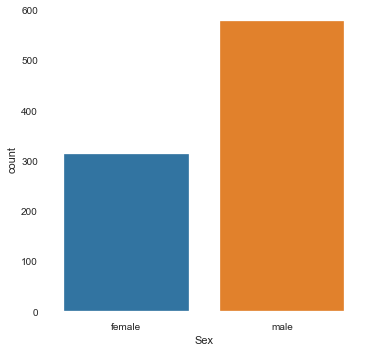

In [81]:
#범주형 확인
#남녀 성비 확인
sns.catplot('Sex', kind='count', data = df)

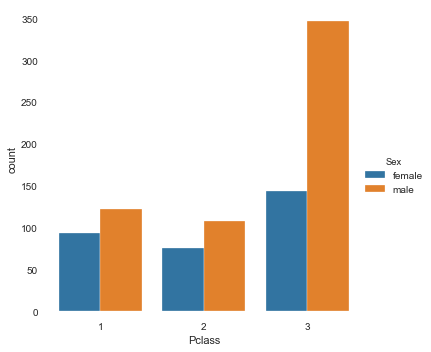

In [82]:
#좌석 등급별 성비 확인
sns.catplot('Pclass', kind='count', hue='Sex', data=df)

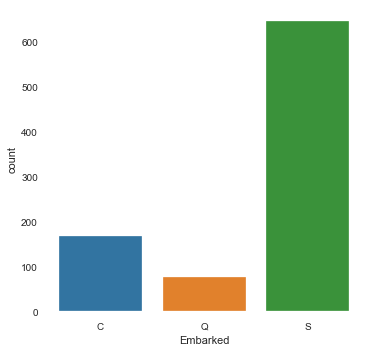

In [83]:
#출발항구별 분포 확인
sns.catplot('Embarked', kind='count', data = df)

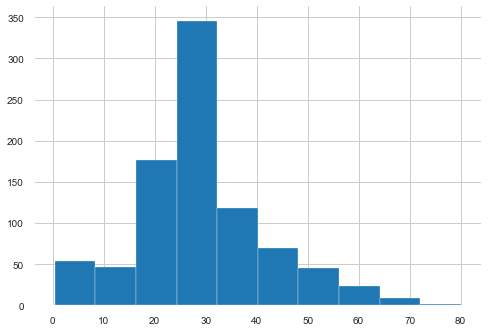

In [84]:
#연속형 #나이 분포
df['Age'].hist()

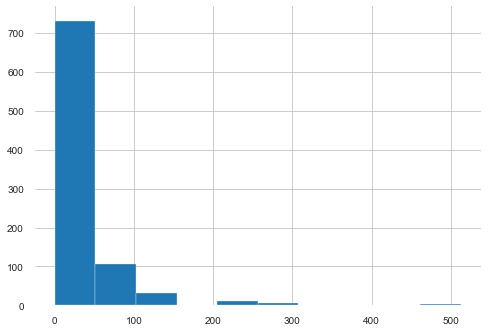

In [85]:
#연속형 #요금 분포
df['Fare'].hist()

287p

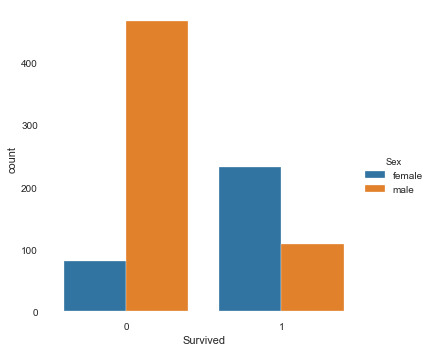

In [86]:
#생존자 분석
sns.catplot('Survived', kind='count', hue='Sex', data = df)

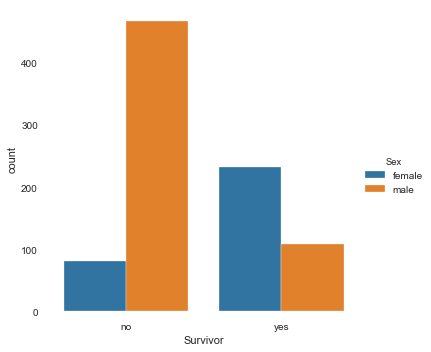

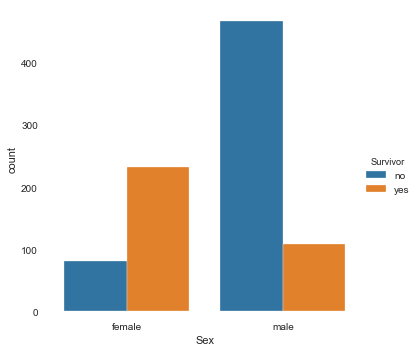

In [87]:
#보기 편하게 생존자 구분 변환
df['Survivor'] = df['Survived'].map({0:'no', 1:'yes'})
#생존/성별
sns.catplot('Survivor', kind='count', hue='Sex', data = df)
#성별/생존자
sns.catplot('Sex', kind='count', hue='Survivor', data = df)
#남자일수록 사망자가 많습니다

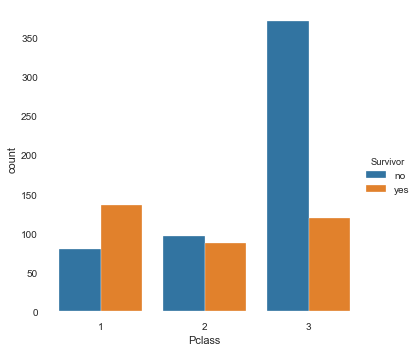

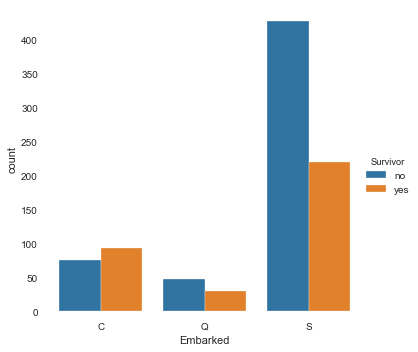

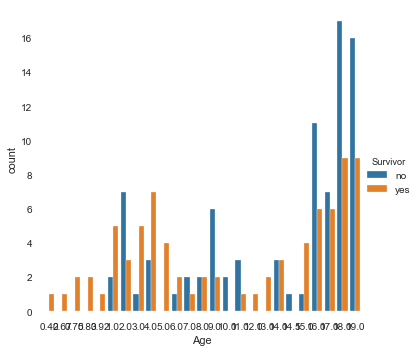

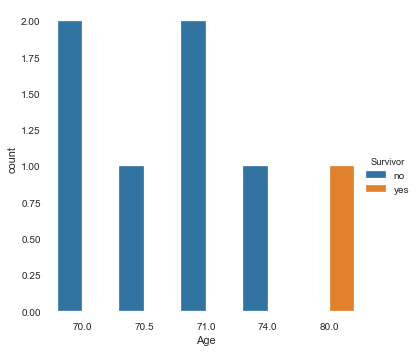

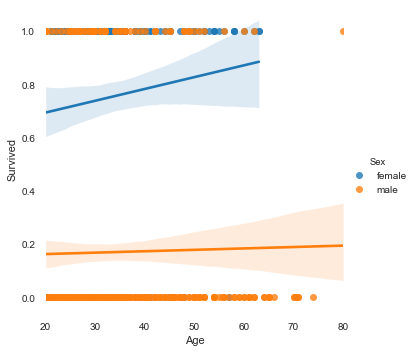

In [91]:
#좌석등급별 생존자 확인
sns.catplot('Pclass', kind='count', hue='Survivor', data = df)
#항구별/생존
sns.catplot('Embarked', kind='count', hue='Survivor', data = df)
#연령대별/사망자 20세 미만의 아이들을 확인
sns.catplot('Age', kind='count', hue='Survivor', data = df.loc[df['Age']<20])
#연령대별/사망자 70세 이상 노인
sns.catplot('Age', kind='count', hue='Survivor', data = df.loc[df['Age']>=70])
#20세 이상, 어른의 경우 연령에 따른 사망률과의 관계는 적으며, 남자일 경우 사망률이 높습니다
sns.lmplot('Age', 'Survived', hue='Sex', data=df.loc[df['Age']>=20])

290p

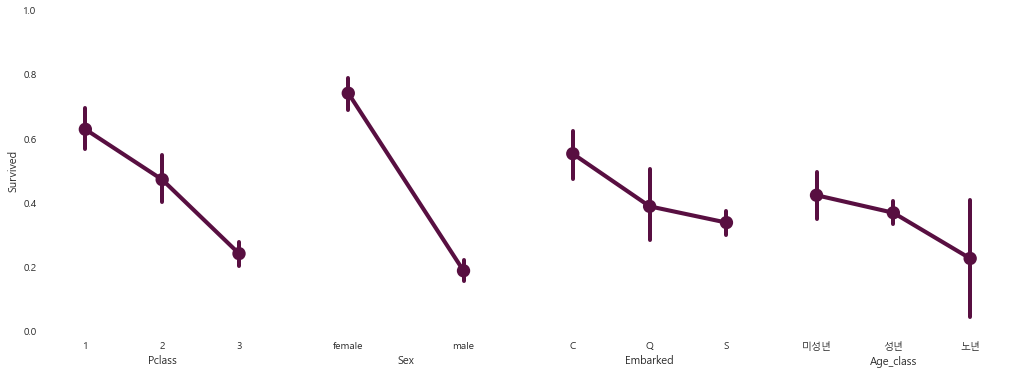

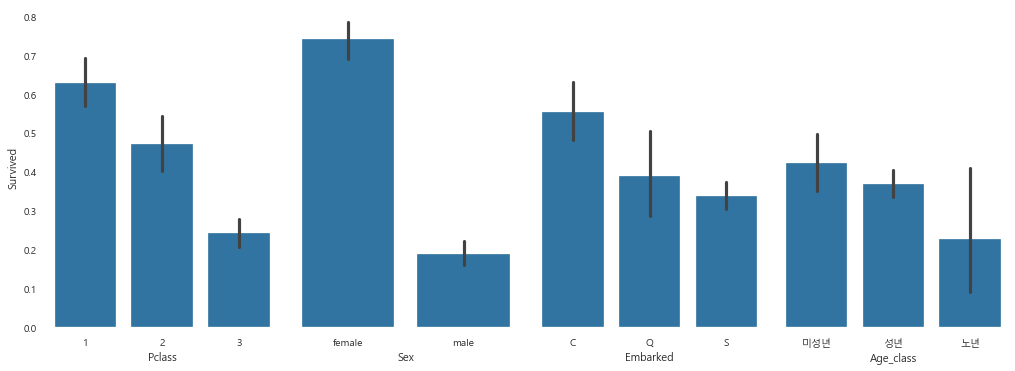

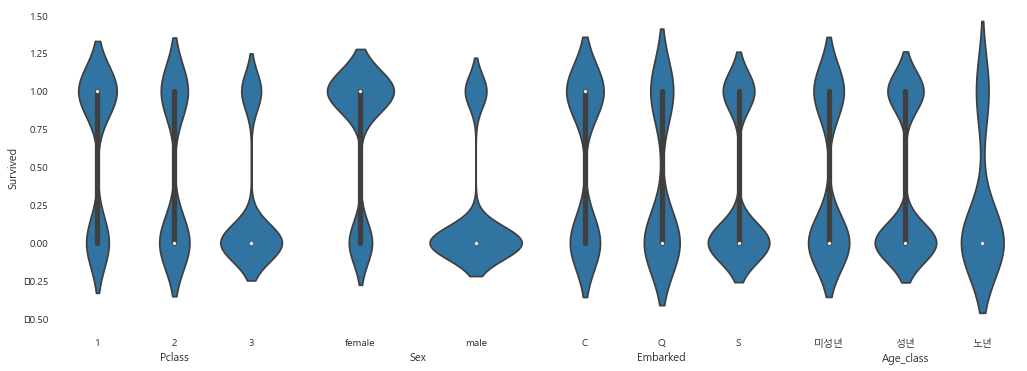

In [95]:
#Pairgrid 플롯활용 범주 전체를 시각화 할 수 있습니다
#생존률/성별, 객실등급별, 탑승항구별, 연령대그룹별
Pg = sns.PairGrid(df, y_vars='Survived', x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'], height=5, aspect=.7)
Pg.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')
Pg.set(ylim=(0,1))
sns.despine(fig=Pg.fig, left=True)

#한글 처리
plt.rc('font', family='Malgun Gothic')
#Pairgird bar 서브 플롯 적용
Pg = sns.PairGrid(df, y_vars="Survived", x_vars=["Pclass", 'Sex', 'Embarked', 'Age_class'], height=5, aspect=.7)
Pg.map(sns.barplot)
#Pairgird violin 서브플롯 적용
Pg = sns.PairGrid(df, y_vars="Survived", x_vars=["Pclass", 'Sex', 'Embarked', 'Age_class'], height=5, aspect=.7)
Pg.map(sns.violinplot)

292p

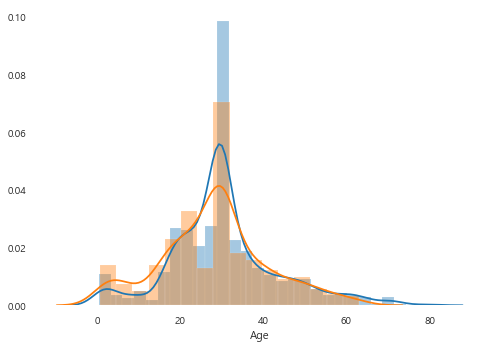

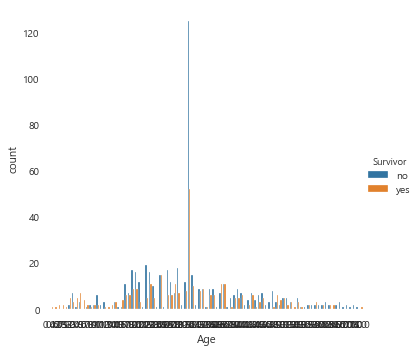

In [103]:
#성별/나이
sns.distplot(df['Age'].loc[df['Sex']=='male'])
sns.distplot(df['Age'].loc[df['Sex']=='female'])
#연령에 따른 사망과 상관성이 성별에 따라 다릅니다
#생존자/나이
sns.catplot('Age', kind='count', hue='Survivor', data=df)

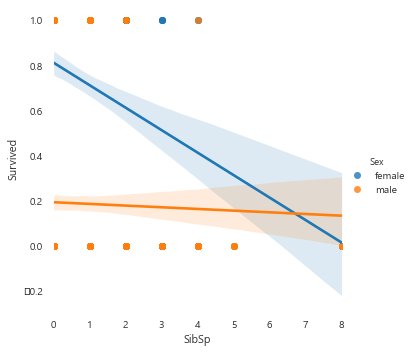

In [104]:
#여성의 경우 형제/자매가 많을 수록 사망률이 증가하며, 남성의 경우 차이가 없는 경향이 있습니다
sns.lmplot('SibSp','Survived', hue='Sex', data=df)

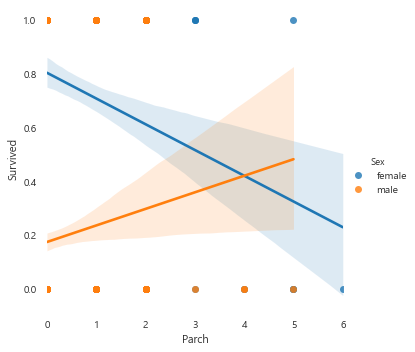

In [105]:
#부모나 자식이 많은 가족의 경우 남자일 경우 사망자가 낮으며, 여성의 경우 사망자가 많은 경향이 있습니다
sns.lmplot('Parch', 'Survived', hue='Sex', data=df)

294p

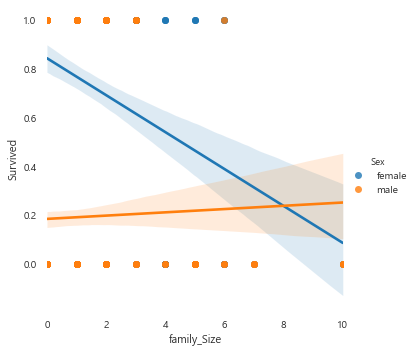

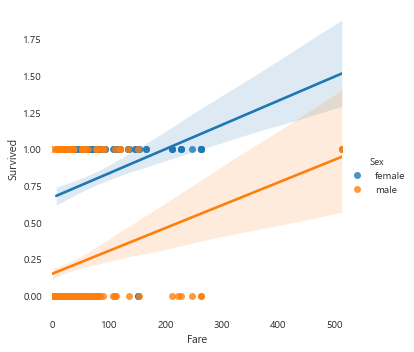

In [106]:
#파생변수 만들기
df['family_Size'] = df['SibSp']+df['Parch']
sns.lmplot('family_Size', 'Survived', hue='Sex', data=df)
#남녀 ㅏㅇ관 없이 요금의 경우 높을 수록 생존율이 높습니다
sns.lmplot('Fare', 'Survived', hue='Sex', data=df)

295p

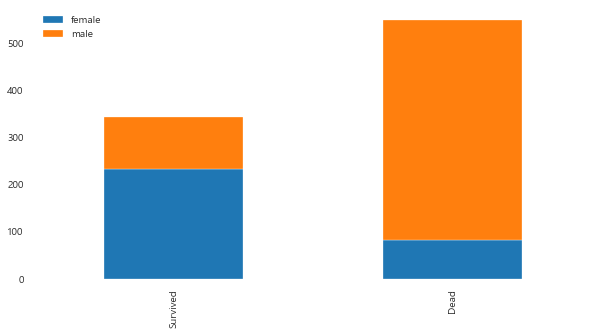

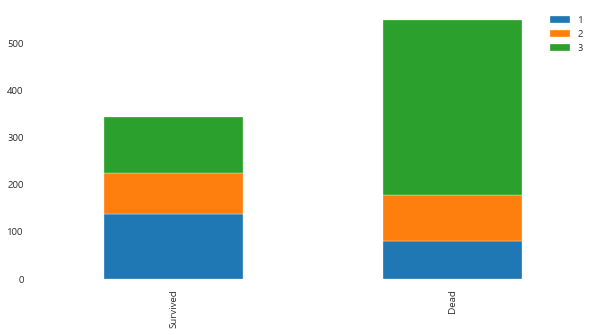

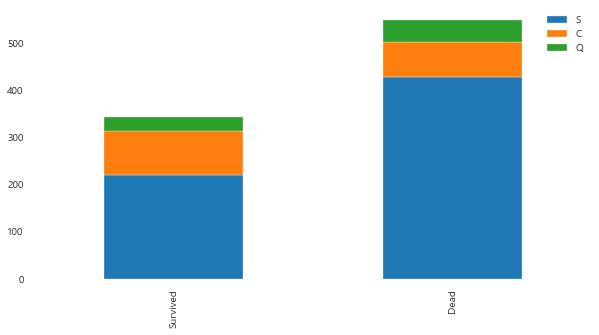

In [107]:
#생존에 따른 bar 차트 함수
def bar_chart(feature):
    Survived = df[df['Survived']==1][feature].value_counts()
    Dead = df[df['Survived']==0][feature].value_counts()
    df_titanic = pd.DataFrame([Survived, Dead])
    df_titanic.index = ['Survived', 'Dead']
    df_titanic.plot(kind='bar', stacked=True, figsize=(10,5))

#생존/ 성별
#여성이 남성보다 생존할 가능성이 더 높습니다
bar_chart('Sex')
#생존/등급별
bar_chart('Pclass')
#생존/항구별
bar_chart('Embarked')